# Discussão sucinta da Formalização do Problema e dos objetivos pretendidos

Racionais MCs transcendem gerações e representam uma multiplicidade de experiências pessoais e contextos para inúmeras pessoas. Há até mesmo uma famosa frase que diz "para toda situação da vida, um verso dos Racionais". A motivação primordial, além de prestar homenagem a um dos maiores grupos de RAP da história, é a busca por novas linhas que se encaixem no contexto do grupo. Ao obter rimas coesas e uma progressão musical embasada, o objetivo é iniciar uma tentativa de generalização para o contexto do RAP. Os algoritmos de treinamento desempenham um papel fundamental para o sucesso desse empreendimento, requerendo a seleção cuidadosa dos métodos de classificação e o treinamento da base de dados. Assim, os principais objetivos incluem a classificação das rimas para garantir uma distribuição coesa e significativa do ponto de vista lírico. Isso será alcançado através do treinamento com a base de dados BERTimbau, adaptada ao universo dos Racionais MCs, de modo a incorporar o contexto previamente estabelecido. O resultado esperado é a geração de novas letras de músicas que ressoem com a essência e a autenticidade do grupo.


# Análise Exploratória dos Dados, detalhando cada etapa realizada, justificando as escolhas e justificando as transformações efetuadas.

## A base de dados é adequada?
Inicialmente a ideia de utilizar letras do Racionais foi boa, pois os textos são grandes e dificilmente repetem-se. Porém, a necessidade do aprendizado do contexto das letras é um pouco mais complicado de ser compreendido pelo algoritmo.
### Existem dados faltantes? Como foram tratados?
Nesta segunda etapa, a intenção é tentar generalizar o contexto, inserindo mais letras do Racionais e, também, algumas participações do grupo ou dos artistas individualmente para que possa ser entendido o universo de interesse.
### Existem variáveis categóricas?
Sim, as rimas. As transformações necessárias envolvem a predição de novas letras a partir das rimas que são sorteadas. Sendo assim, as rimas necessitam ser ordenadas em pares para que possam ser sorteadas.
### Principais Transformações
A geração de novas letras se torna mais fácil a partir da utilização da base BERTimbau, pois já há uma geração de texto e predição de palavras. A maior dificuldade vem na criação de novas letras com uma qualidade lírica mais apurada, a análise das features e tratamento dos dados pode ser uma boa solução, portanto tentei com ....

# Informações estatísticas e Visualização de algumas das features principais

## Importanto, pre processando e exibindo o texto do Racionais

In [33]:
import re
import requests

def preprocessar_texto(texto):
    # Remover caracteres especiais, pontuação e números
    texto = re.sub(r'[^\w\s]', '', texto)
    # Converter para minúsculas
    texto = texto.lower()
    return texto

# URL do arquivo RAW
url_arquivo = 'https://pastebin.com/raw/U7UKgtPe'

# Fazer solicitação HTTP para obter o conteúdo do arquivo
response = requests.get(url_arquivo)
if response.status_code == 200:
    # Extrair o texto do conteúdo da resposta
    texto_raw = response.text
    # Pré-processar o texto
    texto_preprocessado = preprocessar_texto(texto_raw)
    # Exibir o texto pré-processado
    print(texto_preprocessado)
else:
    print("Falha ao fazer solicitação HTTP")

vagabunda queria atacar do malucão
usou meu nome o pipoca abraçou
foi na porta da minha casa
lá botou pânico em todo mundo 3 hora da tarde
e eu nem tava lá vai vendo
é mas aí brown oh tem uns tipo de mulher truta
que não dá nem pra comentar
eu nem sei quem é os maluco isso que é foda
aí vamo atrás desse pipoca aí e já era
ir atrás de quem e aonde sei nem quem é mano
mano não devo não temo e dá meu copo que já era

e aí bandido mal como que é meu parceiro
e aí abraão firmão truta
firmeza total brown e a quebrada aí irmão
tá pampa aí fiquei sabendo do seu pai
aí lamentável truta meu sentimento mesmo mano
vai vendo brown meu pai morreu
e nem deixaram eu ir no enterro do meu coroa não irmão
isso é louco você tava aonde na hora
tava batendo uma bola meu fiquei na mó neurose irmão
aí foram te avisar
é vieram me avisar mas tá firmão bro
eu tô firmão logo mais tô aí na quebrada com vocês aí
é quente na rua também num tá fácil não morô truta
uns juntando inimigo outros juntando dinheiro
sempre 

## Exibição das rimas mais utilizadas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


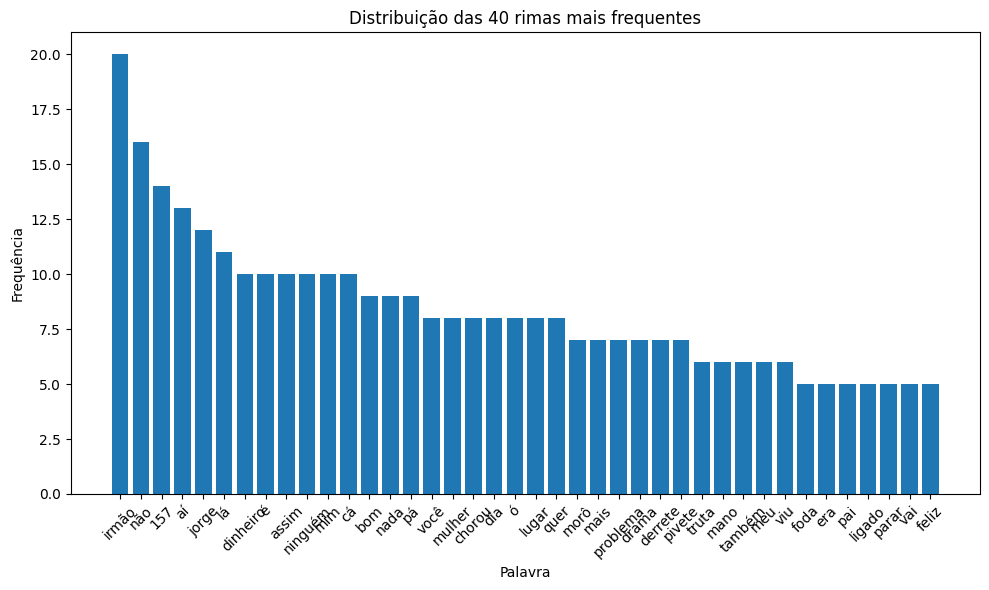

In [34]:
import re
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

# Baixar os recursos necessários do NLTK (caso ainda não tenham sido baixados)
nltk.download('punkt')

# Define uma expressão regular para encontrar a última palavra de cada linha
padrao_ultima_palavra = re.compile(r'\b(\w+)\s*$')

# Lista para armazenar as rimas tokenizadas
rimas_tokenizadas = []

# Para cada linha no texto, encontra a última palavra e tokeniza as rimas
for linha in texto_preprocessado.split('\n'):
    match = padrao_ultima_palavra.search(linha.lower())
    if match:
        ultima_palavra = match.group(1)
        # Tokeniza a última palavra da linha
        tokens = word_tokenize(ultima_palavra, language='portuguese')
        rima_tokenizada = [token.lower() for token in tokens if token.isalnum()]
        rima_tokenizada = ' '.join(rima_tokenizada)
        # Adiciona a rima tokenizada à lista
        rimas_tokenizadas.append(rima_tokenizada)

# Conta a frequência das rimas tokenizadas
frequencia_rimas = {}
for rima in rimas_tokenizadas:
    frequencia_rimas[rima] = frequencia_rimas.get(rima, 0) + 1

# Ordena o dicionário de frequência das rimas
frequencia_rimas_ordenada = dict(sorted(frequencia_rimas.items(), key=lambda item: item[1], reverse=True))

# Extrai as palavras e suas frequências ordenadas
palavras = list(frequencia_rimas_ordenada.keys())
frequencias = list(frequencia_rimas_ordenada.values())

# Plota o gráfico de barras da frequência das rimas
plt.figure(figsize=(10, 6))
plt.bar(palavras[:40], frequencias[:40])  # Plota apenas as 40 palavras mais frequentes
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.title('Distribuição das 40 rimas mais frequentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exibindo os caracteres mais utilizados no texto

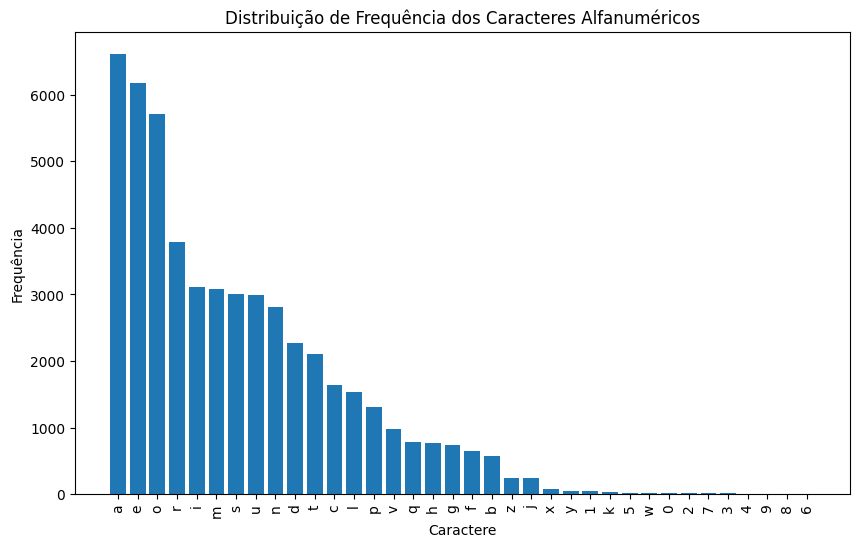

In [35]:
import matplotlib.pyplot as plt
import re

def plot_alphanumeric_text_distribution(text):
    # Remover caracteres não alfanuméricos
    text = re.sub(r'[^a-zA-Z0-9]', '', text)

    # Contar a frequência de cada caractere no texto
    char_frequency = {}
    for char in text:
        char_frequency[char] = char_frequency.get(char, 0) + 1

    # Ordenar os caracteres por frequência
    sorted_char_frequency = sorted(char_frequency.items(), key=lambda x: x[1], reverse=True)

    # Extrair os caracteres e suas frequências
    chars = [pair[0] for pair in sorted_char_frequency]
    frequencies = [pair[1] for pair in sorted_char_frequency]

    # Plotar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(chars, frequencies)
    plt.xlabel('Caractere')
    plt.ylabel('Frequência')
    plt.title('Distribuição de Frequência dos Caracteres Alfanuméricos')
    plt.xticks(rotation=90)
    plt.show()

plot_alphanumeric_text_distribution(texto_preprocessado)


## Imprimindo as palavras mais frequentes no texto

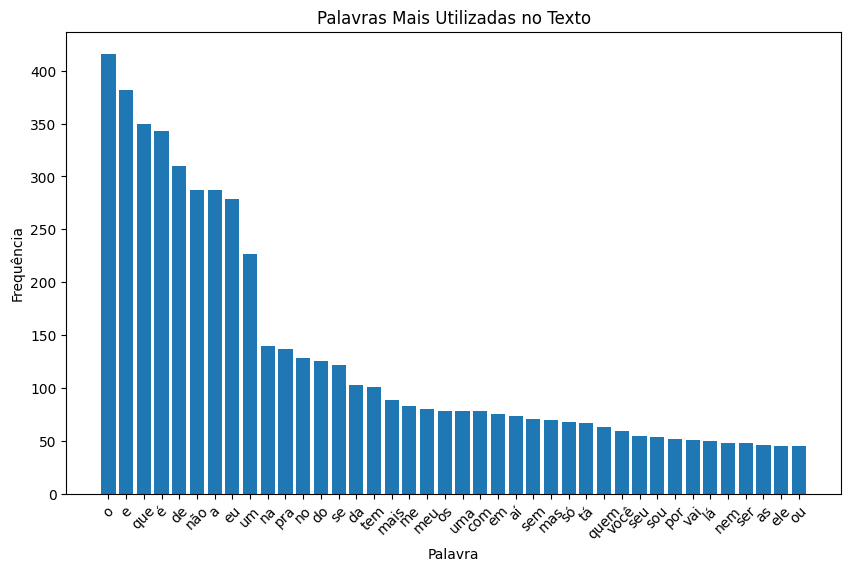

In [36]:
import re
from collections import Counter
import matplotlib.pyplot as plt

def find_most_common_words(text, n=10):
    # Dividir o texto em palavras
    words = re.findall(r'\b\w+\b', text.lower())

    # Contar a frequência de cada palavra
    word_frequency = Counter(words)

    # Selecionar as palavras mais utilizadas
    most_common_words = word_frequency.most_common(n)

    return most_common_words

# Encontrar as 10 palavras mais utilizadas
most_common_words = find_most_common_words(texto_preprocessado, n=40)

# Extrair as palavras e suas frequências
words = [word for word, _ in most_common_words]
frequencies = [frequency for _, frequency in most_common_words]

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.title('Palavras Mais Utilizadas no Texto')
plt.xticks(rotation=45)
plt.show()


## Análise textual

In [41]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 46.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [43]:
# Carregar o modelo de linguagem em português do Brasil do spaCy
nlp = spacy.load("pt_core_news_sm")

# Processar o texto com spaCy
doc = nlp(texto_preprocessado)

# Lista para armazenar os verbos e substantivos
verbos = []
substantivos = []

# Iterar pelas palavras no documento processado
for token in doc:
    # Verificar se o token é um verbo
    if token.pos_ == "VERB" and token.tag_.startswith("V"):
        verbos.append(token.text)
    # Verificar se o token é um substantivo
    elif token.pos_ == "NOUN":
        substantivos.append(token.text)

# Contar a frequência de ocorrência dos verbos e substantivos
contagem_verbos = Counter(verbos)
contagem_substantivos = Counter(substantivos)

# Extrair os verbos e substantivos mais comuns (top 10)
top_verbos = contagem_verbos.most_common(20)
top_substantivos = contagem_substantivos.most_common(20)

### Verbos

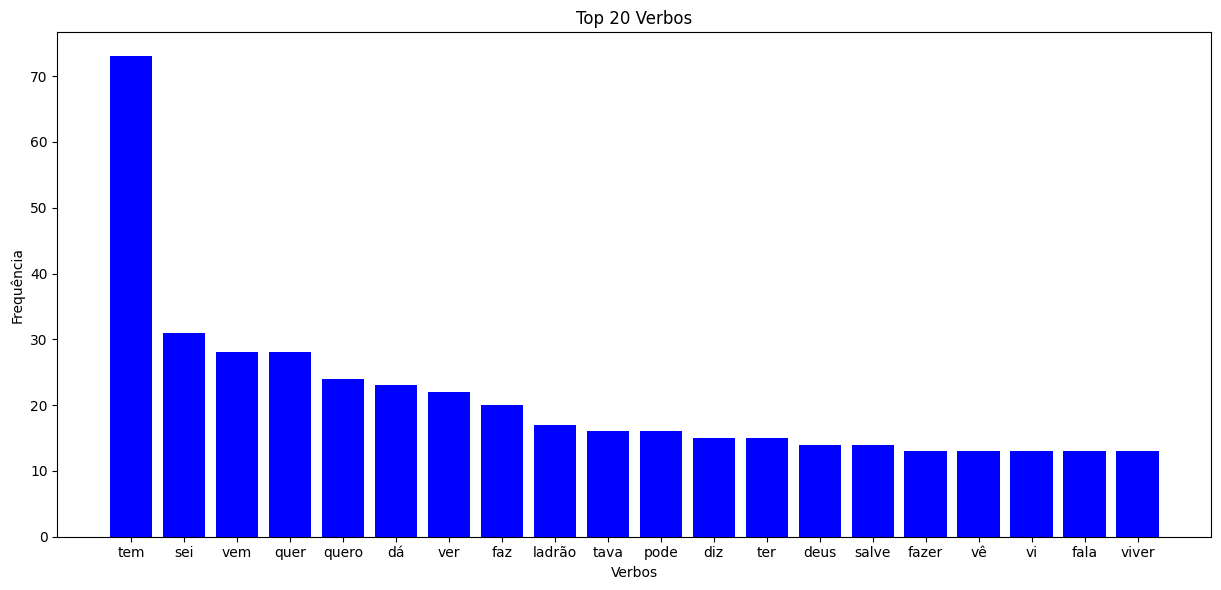

In [44]:
# Plotar os gráficos
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
plt.bar([v[0] for v in top_verbos], [v[1] for v in top_verbos], color='blue')
plt.xlabel('Verbos')
plt.ylabel('Frequência')
plt.title('Top 20 Verbos')

plt.tight_layout()
plt.show()

### Substantivos

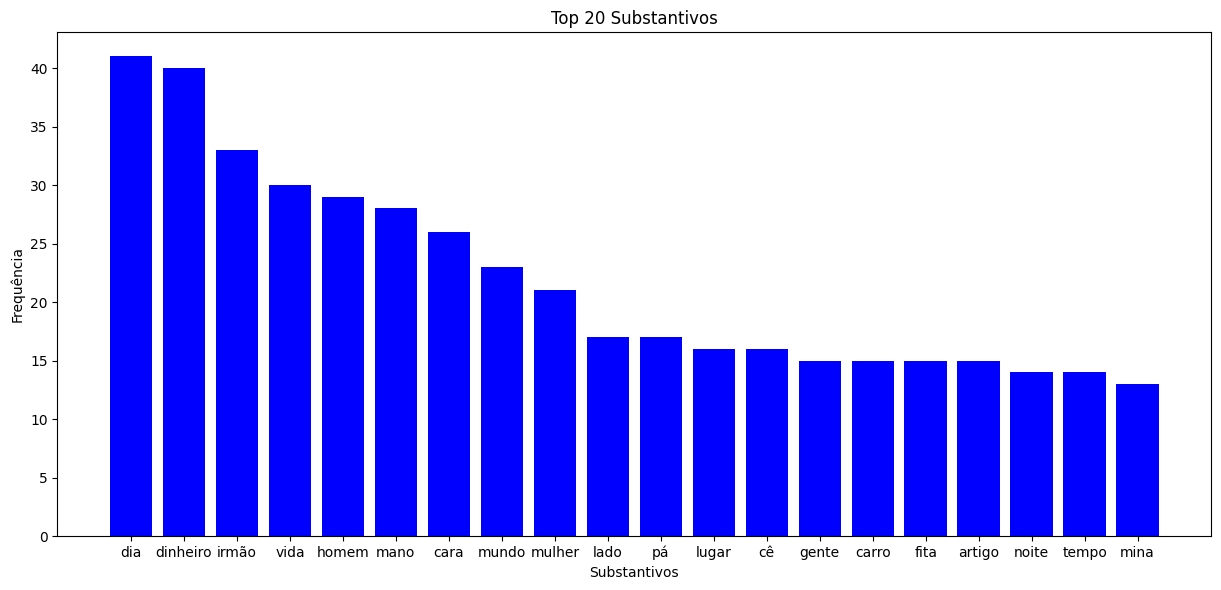

In [45]:

plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 2)
plt.bar([s[0] for s in top_substantivos], [s[1] for s in top_substantivos], color='blue')
plt.xlabel('Substantivos')
plt.ylabel('Frequência')
plt.title('Top 20 Substantivos')


plt.tight_layout()
plt.show()

# Quais foram as principais decisões de projeto nessa etapa?

Ao longo desta discussão, algumas das principais decisões de trabalho foram:

* Pré-processamento do texto: Realizar etapas de pré-processamento no texto antes de tokenizá-lo. Isso incluiu remover caracteres especiais, pontuação e números, bem como converter todo o texto em minúsculas. Essas etapas ajudaram a limpar o texto e a padronizá-lo para o tokenizador;
* Exploração do texto: O texto em questão foi explorado, incluindo a distribuição de substantivos, verbos, as palavras mais frequentes, os caracteres mais utilizados e as rimas mais comuns. Isso forneceu insights sobre o conteúdo e a estrutura do texto e auxiliou na melhor compreensão do comportamento do modelo;
* Escolha do modelo pré-treinado: Testar o modelo BERT pré-treinado em português (rufimelo/Legal-BERTimbau-base) fornecido pela comunidade do Hugging Face. Essa escolha foi baseada na disponibilidade do modelo e na sua capacidade de lidar com tarefas de processamento de linguagem natural em português;
* Tokenização: Testar o tokenizador BERT para tokenizar o texto pré-processado. Uma estratégia é definir um comprimento máximo de tokens para garantir que o texto tokenizado pudesse ser processado eficientemente pelo modelo;
* Treinamento do modelo: Treinar o modelo BERT usando o texto tokenizado. Isso envolve o uso de um otimizador para ajustar os pesos do modelo com base nas previsões e no cálculo da perda em cada época de treinamento;
* Avaliação da acurácia: Durante o treinamento, será implementada uma métrica para avaliar a acurácia das previsões do modelo. Isso permitirá monitorar o desempenho do modelo ao longo do tempo e identificar áreas de melhoria;
* Inserção de mais dados na base: Foi perceptível a necessidade de mais informações para treinar o modelo, para que o universo de pesquisa seja compreendido pelo algoritmo e consiga gerar letras mais coesas ou, até mesmo, fazer a predição das letras;

Mais abaixo será possível observar quais serão as novas escolhas referentes aos algoritmos e a forma de treinamento destes.

# Exemplo de utilização do modelo pré-treinado BERTimbau

In [46]:
from transformers import AutoModelForMaskedLM
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("rufimelo/Legal-BERTimbau-base")
model = AutoModelForMaskedLM.from_pretrained("rufimelo/Legal-BERTimbau-base")

## Fazendo predições através de um label

In [47]:
from transformers import AutoTokenizer
from transformers import AutoModelForMaskedLM
from  transformers  import  pipeline

In [48]:
pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)
pipe('Ser ou não ser, eis a [MASK]')

[{'score': 0.9962694644927979,
  'token': 4162,
  'token_str': 'questão',
  'sequence': 'Ser ou não ser, eis a questão'},
 {'score': 0.000817098596598953,
  'token': 119,
  'token_str': '.',
  'sequence': 'Ser ou não ser, eis a.'},
 {'score': 0.00046225127880461514,
  'token': 3087,
  'token_str': 'decisão',
  'sequence': 'Ser ou não ser, eis a decisão'},
 {'score': 0.0004205824516247958,
  'token': 4145,
  'token_str': 'razão',
  'sequence': 'Ser ou não ser, eis a razão'},
 {'score': 0.0003508694644551724,
  'token': 10573,
  'token_str': 'pergunta',
  'sequence': 'Ser ou não ser, eis a pergunta'}]

In [49]:
pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)
pipe('A [MASK] cheia, clareia as ruas do Capão')

[{'score': 0.2297157198190689,
  'token': 13943,
  'token_str': 'lua',
  'sequence': 'A lua cheia, clareia as ruas do Capão'},
 {'score': 0.21356083452701569,
  'token': 1991,
  'token_str': 'água',
  'sequence': 'A água cheia, clareia as ruas do Capão'},
 {'score': 0.06903970241546631,
  'token': 2954,
  'token_str': 'noite',
  'sequence': 'A noite cheia, clareia as ruas do Capão'},
 {'score': 0.05121888220310211,
  'token': 596,
  'token_str': 'tempo',
  'sequence': 'A tempo cheia, clareia as ruas do Capão'},
 {'score': 0.04503914341330528,
  'token': 7856,
  'token_str': 'Lua',
  'sequence': 'A Lua cheia, clareia as ruas do Capão'}]


## Revisão da Literatura: discuta artigos e projetos semelhantes que você se baseou para suas escolhas.
Estes trabalhos trazem a temática de geração novas letras de música a partir de algoritmos de deeplearning. Porém, abordam de maneiras diferentes e acrescem no aprendizado nesta temática, pois é possível observar propostas diferentes e compreender os algoritmos e suas utilizações nestes casos. Portanto, será discorrido um pouco mais sobre algumas das referências utilizadas para este trabalho.


## Como pretende avaliar o impacto dessas decisões na etapa seguinte deste trabalho?
A partir dos testes de predição com o modelo pre treinado com letras do Racionais, em caso de acurácia alta, será implementada a classificação das rimas para que comecem a ser geradas novas letras de RAP.
As rimas serão classificadas ....
Portanto, o impacto destas decisões vão refletir em um texto mais coeso, sendo assim .......

# Descrever, sucintamente, a metodologia para execução das simulações computacionais da etapa seguinte.
As simulações terão como objetivo central a geração de novas linhas de RAP que rimem, façam sentido líricamente e sejam coesas em sua temática central. A princípio, as rimas serão separadas em:
* Pares de rimas, na ordem em que acontecem, para que a geração de novas linhas tenham as "mesmas" rimas que em letras originais;
* Rimas iguais, ou com o mesmo fim de palavra, para que as rimas possam ser facilmente encaixadas e o custo maior seja para manter a coesão textual;
* Rimas na metade e nos finais dos versos, melhorando a métrica e a lírica, porém, será mais custoso de implementar;
* Dividir a base de dados entre treinamento e teste, pode ser que aumente a acurácia final do algoritmo;

## Qual(is) Algoritmo(s) de Machine/Deep Learning pretende utilizar?
Durante o processo discutido, focou-se principalmente no uso de modelos de linguagem pré-treinados, especificamente o modelo BERT (Bidirectional Encoder Representations from Transformers). O BERT é uma arquitetura de rede neural baseada em transformers e é treinado em grandes corpora de texto não supervisionado. Ele captura a bidirecionalidade do contexto em uma sequência de palavras, permitindo uma compreensão mais profunda e contextualizada do texto.
Embora o BERT seja frequentemente usado em tarefas de NLP (Processamento de Linguagem Natural), como classificação de texto, marcação de sequência e preenchimento de lacunas, neste caso, está sendo utilizado para gerar novas letras de músicas com a temática do Racionais. Isso foi feito treinando o modelo BERT em um conjunto de dados composto por letras de músicas pré-processadas e tokenizadas do Racionais.
Além do BERT, outros algoritmos de machine learning não foram diretamente utilizados neste processo. No entanto, para treinar o modelo BERT, foram empregadas técnicas de otimização como AdamW (uma variação do algoritmo de otimização Adam) e calculamos a perda (loss) durante o treinamento para atualizar os pesos do modelo.

Além do BERT, existem outros algoritmos de machine learning que podem ser explorados para tarefas relacionadas ao processamento de linguagem natural (NLP) e geração de texto. Aqui estão alguns exemplos:

1. **GPT (Generative Pre-trained Transformer)**: Similar ao BERT, o GPT é uma arquitetura de modelo de linguagem baseada em transformers, mas foca na geração de texto. Ele é treinado de forma não supervisionada em grandes corpora de texto e é capaz de gerar texto coerente e contextualmente relevante. Pode ser encontrado em: https://huggingface.co/docs/transformers/model_doc/gpt2


2. **LSTM (Long Short-Term Memory)**: LSTM é uma arquitetura de rede neural recorrente (RNN) projetada para lidar com sequências de dados, como texto. É conhecido por capturar dependências de longo prazo em dados sequenciais, o que o torna útil para tarefas de geração de texto, tradução automática, entre outras.

3. **Transformer-XL**: Outra variação da arquitetura transformer, o Transformer-XL é projetado para capturar dependências de longo prazo em sequências de texto. Ele é particularmente útil para modelar textos mais longos, mantendo uma memória mais longa de contextos anteriores. Pode ser encontrado em: https://huggingface.co/docs/transformers/model_doc/transfo-xl

4. **Seq2Seq (Sequence-to-Sequence)**: Este é um framework que consiste em dois modelos RNN, um codificador e um decodificador, usado principalmente para tarefas de tradução automática e geração de respostas em chatbots. Ele é capaz de traduzir uma sequência de entrada em uma sequência de saída. Pode ser encontrado em: https://huggingface.co/facebook/bart-large-mnli

5. **Word2Vec**: Embora não seja um modelo de geração de texto, é um algoritmo popular de embedding de palavras que mapeiam palavras em vetores de números reais. Esses vetores de palavras podem ser usados como entrada para outros modelos de machine learning ou deep learning em tarefas de processamento de linguagem natural. Pode ser encontrado em: https://huggingface.co/Word2vec

6. **XLM-RoBERTa**: Este é um modelo da família RoBERTa (Robustly optimized BERT approach) treinado em múltiplos idiomas, incluindo o português. Ele tende a fornecer bons resultados em tarefas de PLN multilíngues. Pode ser encontrado em: https://huggingface.co/docs/transformers/model_doc/xlm-roberta

Nesta próxima etapa serão testados estes modelos e o resultado da utilização deles na geração de novas letras, será medida a partir da coesão textual que for apresentada nos resultados. Uma das maiores limitações é sobre o texto ser em português, onde têm-se uma gama muito menor de bibliotecas e modelos pré-treinados nesta língua. Porém, alguns foram encontrados e serão testados.


## Qual(is) métrica(s) de desempenho pretende utilizar?

Para avaliar o desempenho de modelos de processamento de linguagem natural (NLP) e geração de texto, serão testadas várias métricas.

1. **Perplexidade**: É uma métrica comum para modelos de linguagem que mede quão bem o modelo é capaz de prever uma sequência de palavras. Quanto menor a perplexidade, melhor o desempenho do modelo.

2. **BLEU (Bilingual Evaluation Understudy)**: É uma métrica de avaliação automática usada para avaliar a qualidade de traduções geradas por sistemas de tradução automática. Ela compara a saída do sistema com uma ou mais traduções de referência.

3. **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)**: É uma família de métricas usadas para avaliar a qualidade de resumos automáticos e geração de texto. Ele compara a similaridade entre o texto gerado e um ou mais textos de referência, com base em métricas de sobreposição de palavras.


4. **Accuracy (Precisão)**: Para tarefas de classificação de texto, como análise de sentimento, classificação de tópicos, entre outras, a precisão pode ser uma métrica relevante que mede a proporção de previsões corretas em relação ao total de previsões.


5. **F1-Score**: É uma métrica que combina precisão e recall em uma única pontuação, calculada como a média harmônica entre os dois. É útil em tarefas de classificação binária e multiclasse.

6. **Perda (Loss)**: Em treinamentos de modelos de aprendizado supervisionado, a perda é frequentemente usada como uma métrica para avaliar a eficácia do modelo durante o treinamento. O objetivo é minimizar a perda ao longo do tempo.

## Pretende comparar seus resultados com qual(is) referência(s) (outros modelos; trabalhos relacionados).

Mantendo alguns trabalhos que foram descritos, assim como referências, no estudo anterior será possível incluir alguns outros documentos e projetos que se assemelham ou que trouxeram algum nível de auxílio para o desenvolvimento deste trabalho. Sendo assim, vamos discorrer um pouco sobre.


    Gerando novas letras do Kanye West a partir de LSTM
    https://github.com/robbiebarrat/rapping-neural-network

    Gerando linhas de RAP a partir de uma rede neural
    https://github.com/vidursatija/rhymenet

    Gerando linhas de RAP a partir de uma rede neural
    https://github.com/nikodraca/rddt

# Referências

  POTASH, Peter; ROMANOV, Alexey; RUMSHISKY, Anna. Ghostwriter: Using an lstm for automatic rap lyric generation. In: Proceedings of the 2015 Conference on Empirical Methods in Natural Language Processing. 2015. p. 1919-1924.
  https://arxiv.org/pdf/2107.01875

  JULIANI, Jeferson da Silva. Gerando letras musicais utilizado uma rede neural recorrente LSTM-Long Short-Term Memory. 2019.
  https://repositorio.ufc.br/bitstream/riufc/49519/1/2019_tcc_jsjuliani.pdf

  POTASH, Peter; ROMANOV, Alexey; RUMSHISKY, Anna. Ghostwriter: Using an lstm for automatic rap lyric generation. In: Proceedings of the 2015 Conference on Empirical Methods in Natural Language Processing. 2015. p. 1919-1924.
  https://aclanthology.org/D15-1221.pdf

  ANAND, Advaith et al. Rap Lyric Generation: A Phoneme-Based LSTM Approach.
  https://michaelshum.github.io/files/rap-lyric-generation.pdf  